<a href="https://colab.research.google.com/github/anastasiashapoval/machine-learning/blob/main/%D0%BB%D1%8010_%D0%BC%D0%BD_%D1%88%D0%B0%D0%BF%D0%BE%D0%B2%D0%B0%D0%BB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Лабораторна робота 10

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [4]:
# Масштабування пікселів до діапазону [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Перетворення міток на категоріальні дані
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

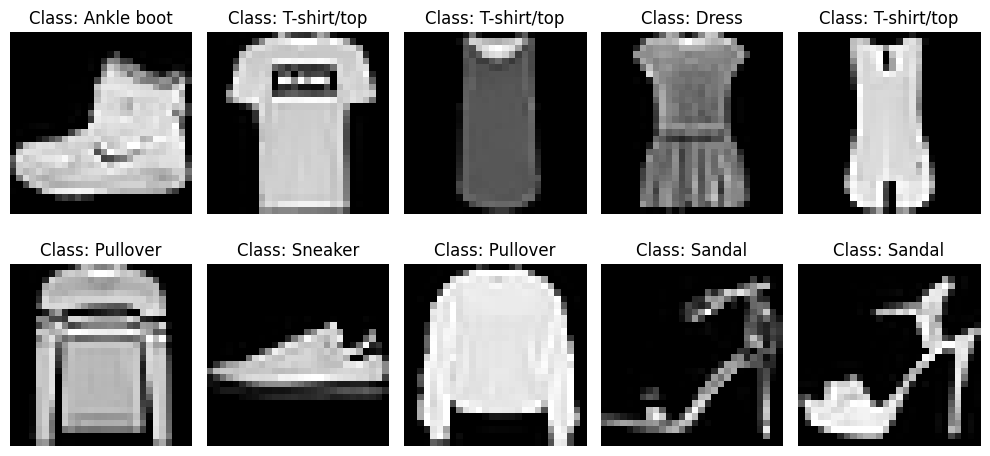

In [6]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(f'Class: {class_names[y_train[i]]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [7]:
# Створення моделі
model = Sequential([
    Input(shape=(28, 28, 1)),

    Conv2D(32, kernel_size=(3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), padding="same", activation="relu"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), padding="same", activation="relu"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(10, activation='softmax')
    ])

# Компіляція моделі
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [8]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

# Навчання моделі
history = model.fit(
    x_train, y_train_cat,
    batch_size=128,
    epochs=100,
    validation_data=(x_test, y_test_cat),
    callbacks=[early_stopping, reduce_lr]
)




Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.7551 - loss: 0.7039 - val_accuracy: 0.6282 - val_loss: 1.1236 - learning_rate: 0.0010
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8708 - loss: 0.3556 - val_accuracy: 0.8836 - val_loss: 0.3121 - learning_rate: 0.0010
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8860 - loss: 0.3064 - val_accuracy: 0.8971 - val_loss: 0.2802 - learning_rate: 0.0010
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8965 - loss: 0.2769 - val_accuracy: 0.9078 - val_loss: 0.2536 - learning_rate: 0.0010
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9031 - loss: 0.2599 - val_accuracy: 0.9086 - val_loss: 0.2545 - learning_rate: 0.0010
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9115 - loss: 0.2382 - val_accuracy: 0.9073 - val_loss: 0.2455 - learning_rate: 0.0010
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9146 - loss: 

In [9]:
# Оцінка моделі
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f'Test accuracy: {test_acc}')
print(f'Test loss: {test_loss}')

# Збереження вагів моделі після тренування
model.save('fashion_mnist_model.keras')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9310 - loss: 0.1996
Test accuracy: 0.9327999949455261
Test loss: 0.19447384774684906


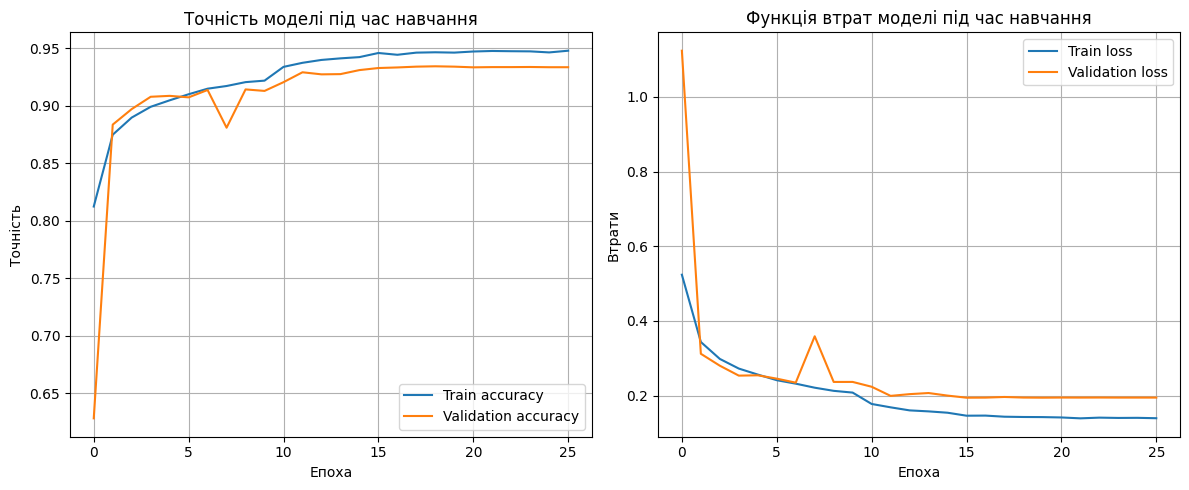

In [11]:
# Побудова графіку точності
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Точність моделі під час навчання')
plt.xlabel('Епоха')
plt.ylabel('Точність')
plt.legend()
plt.grid(True)

# Побудова графіку функції втрат
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Функція втрат моделі під час навчання')
plt.xlabel('Епоха')
plt.ylabel('Втрати')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


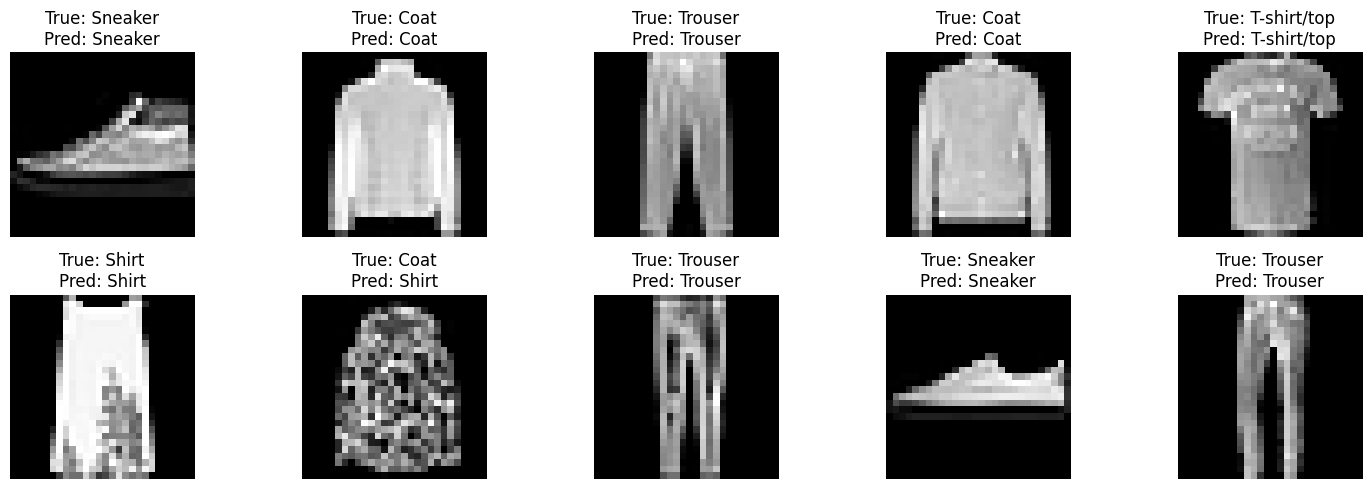

In [18]:
# Прогнозування
y_pred_probs = model.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test_cat, axis=1)

# Випадкові індекси
random_indices = np.random.choice(x_test.shape[0], 10, replace=False)

# Виведення зображень
plt.figure(figsize=(15, 5))
for i, idx in enumerate(random_indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.axis('off')
    true_label = class_names[y_true_classes[idx]]
    pred_label = class_names[y_pred_classes[idx]]
    plt.title(f'True: {true_label}\nPred: {pred_label}')
plt.tight_layout()
plt.show()

Висновок: під час виконання даної лабораторної роботи була побудована згортками нейронна мережа для класифікації зображень. Була використання рання зупинка та зменшення швидкості для запобігання перенавчання. Модель навчалась 26 епох і досягла таких значень: точність - 0.93, втрати - 0.19. Точність дуже висока, модель працює відмінно. Також, були побудовані криві навчання. Видно, що точність зростає, а втрати - спадають. Ефекти перенавчання відсутні. Було виведено 10 випадкових зображень зі справжним та передбаченим класом, класи співпадають в 9-10 випадках.